In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from datetime import datetime, date
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

url = "/kaggle/input/tesla-stock-data-from-2010-to-2020/TSLA.csv"

df=pd.read_csv(url)
df.head()

df.isna().any()

#df['Open'].plot(figsize=(16,8))
#df.info()

df['Date'] = df['Date'].str.replace('-','').astype(float)
#df.info()

from sklearn.model_selection import train_test_split

prices = df[['Date', 'Open']].copy()
prices.head()


,Date,Open
0,20100629.0,19.000000
1,20100630.0,25.790001
2,20100701.0,25.000000
3,20100702.0,23.000000
4,20100706.0,20.000000


 LR : 0.784233 (0.025547)
 LASSO : 0.784233 (0.025547)
 EN : 0.784233 (0.025547)
 KNN : 0.995388 (0.000867)
 CART : 0.995781 (0.000955)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return

 SVR : 0.821913 (0.031684)
20201223
20201224
20201225
20201226
20211227
38.953868735942955


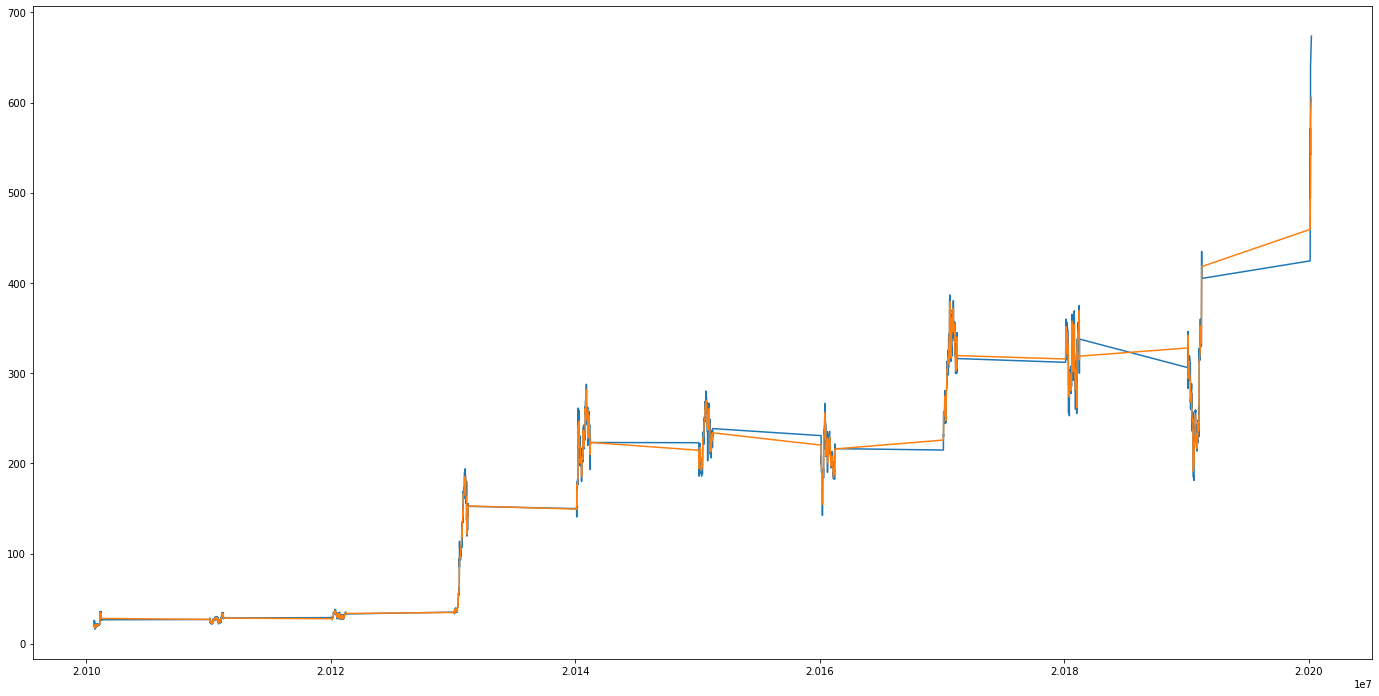

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from datetime import datetime, date
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

url = "/kaggle/input/tesla-stock-data-from-2010-to-2020/TSLA.csv"

df=pd.read_csv(url)
df.head()

df.isna().any()

#df['Open'].plot(figsize=(16,8))
#df.info()

df['Date'] = df['Date'].str.replace('-','').astype(float) 
#df.info()

from sklearn.model_selection import train_test_split

prices = df[['Date', 'Open']].copy()
prices.head()

dataset = prices.values
Y = dataset[:,1].reshape(-1,1)
X = dataset[:,0:1]

validation_size = 0.15
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = "r2"

# Spot-Check Algorithms
models = []
models.append((' LR ', LinearRegression()))
models.append((' LASSO ', Lasso()))
models.append((' EN ', ElasticNet()))
models.append((' KNN ', KNeighborsRegressor()))
models.append((' CART ', DecisionTreeRegressor()))
models.append((' SVR ', SVR()))

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    # print(cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
dates = ["2020-12-23", "2020-12-24", "2020-12-25", "2020-12-26", "2021-12-27",]
#convert to float
for dt in dates:
    datee = 0
    for x in dt:
        if x != '-':
            datee = datee*10+int(x);
    print(datee)
    datee = datee // 10**9
    np.append(X, float(datee))

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

# Define model
model = KNeighborsRegressor()
# Fit to model
model.fit(X_train, Y_train)
# predict
predictions = model.predict(X)
print(mean_squared_error(Y, predictions))

# %matplotlib inline 
fig= plt.figure(figsize=(24,12))
plt.plot(X,Y)
plt.plot(X,predictions)
plt.show()

In [122]:
dates = ["2020-12-23", "2020-12-24", "2020-12-25", "2020-12-26", "2020-12-27",]
#convert to time stamp
for dt in dates:
    datee = 0
    for x in dt:
        if x != '-':
            datee = datee*10+int(x);
    print(datee)
    np.append(X, datee)


20201223
20201224
20201225
20201226
20201227
